In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns



In [2]:
customers =pd.read_csv("Ecommerce Customers.csv")

In [3]:
customers.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


customers.info()

In [8]:
customers.drop(['Email','Address','Avatar'],axis=1)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


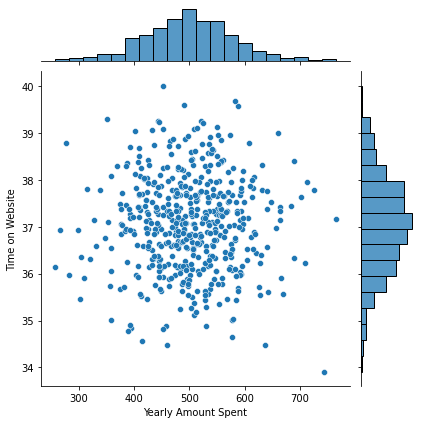

In [13]:
sns.jointplot(data='customers',y=customers['Time on Website'],x=customers['Yearly Amount Spent'])

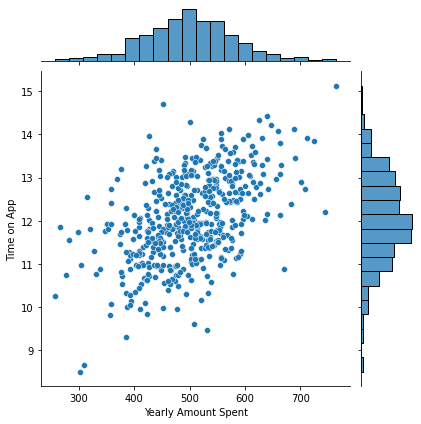

In [14]:
sns.jointplot(data='customers',y=customers['Time on App'],x=customers['Yearly Amount Spent'])

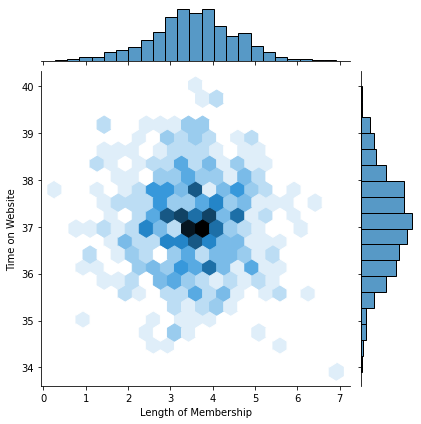

In [18]:
sns.jointplot(data='customers',y=customers['Time on Website'],x=customers['Length of Membership'],kind="hex")

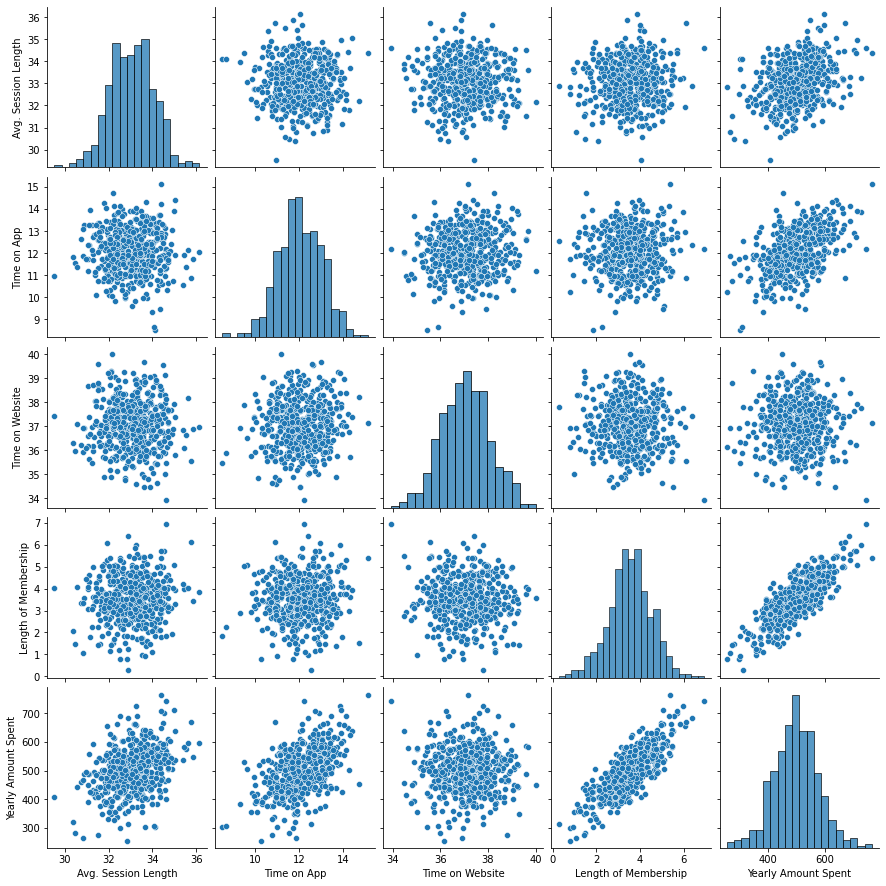

In [23]:
sns.pairplot(data=customers)

In [ ]:
#YEARLY AMOUNT SPENT AND TIME ON APP ARE MOST CORRELATED

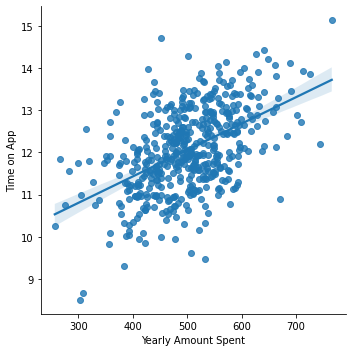

In [33]:
sns.lmplot(data=customers,y='Time on App',x='Yearly Amount Spent')

In [34]:
y=customers['Yearly Amount Spent']


In [35]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [37]:
x=customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lm=LinearRegression()

In [44]:
lm.fit(x_train,y_train)

LinearRegression()

In [45]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [47]:
pred=lm.predict(x_test) # predicting value of yearly amount spent for test data this shoudl be sme what similar to y_test

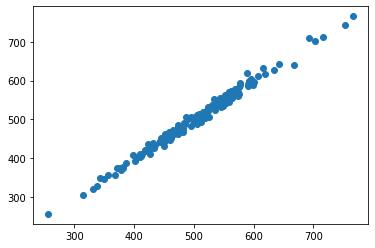

In [51]:
pl.scatter(pred,y_test)

In [52]:
from sklearn import metrics

metrics.mean_absolute_error(y_test,pred)

7.228148653430826

In [53]:
metrics.mean_squared_error(y_test,pred)

79.81305165097427

In [55]:
np.sqrt(metrics.mean_squared_error(y_test,pred))

8.933815066978624

C:\Users\kulu1\AppData\Local\Temp\ipykernel_21344\2475712250.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-pred),bins=50)


<AxesSubplot: xlabel='Yearly Amount Spent', ylabel='Density'>

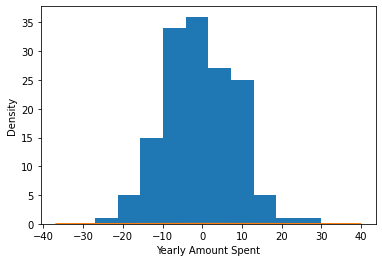

In [59]:
pl.hist(y_test-pred)
sns.distplot((y_test-pred),bins=50)

In [ ]:
# #In general, the coefficient for each 
# independent variable represents the change in the dependent variable that is associated with a one-unit change in that independent variable, 
# holding all other independent variables constant.


In [60]:
pd.DataFrame(lm.coef_,x.columns,columns=['Coeff'])

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
